# Correlator reading 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [69]:
#!pip3.11 install h5py

In [1]:
import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars

# Reading

In [71]:
'''
configID = "090125_180923"

#basefolder = "/home/tag-e/phd/data_folders/2PointCorrelation/"
basefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint"
filename = basefolder + f"hadspec.{configID}.h5" # configID are these numbers in the file names

T = 48
C2pt = np.zeros(48, dtype = complex) 
with h5.File(filename, 'r') as h5f:
    C2pt = h5f[f"cfg{configID}/hspectrum/GN3x60-P/mq-0.09933/proton_3/PX0_PY0_PZ0"][()]
    type(C2pt)
    np.shape(C2pt)
'''

'\nconfigID = "090125_180923"\n\n#basefolder = "/home/tag-e/phd/data_folders/2PointCorrelation/"\nbasefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint"\nfilename = basefolder + f"hadspec.{configID}.h5" # configID are these numbers in the file names\n\nT = 48\nC2pt = np.zeros(48, dtype = complex) \nwith h5.File(filename, \'r\') as h5f:\n    C2pt = h5f[f"cfg{configID}/hspectrum/GN3x60-P/mq-0.09933/proton_3/PX0_PY0_PZ0"][()]\n    type(C2pt)\n    np.shape(C2pt)\n'

In [72]:
'''
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]
files[0].name
'''

"\np = Path(basefolder).glob('**/*')\nfiles = [x for x in p if x.is_file()]\nfiles[0].name\n"

In [73]:
#basefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/" 
#basefolder_2p = basefolder + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"
#basefolder_3p = basefolder + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/T8/"

In [106]:
##### read everything (for 2p)

#folder with all the data
basefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/" + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"

#Path file to the data folder
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]

#number of data files (i.e. the number of gauge configurations, and for each the 2point correlator is computed)
nconf = len(files)

#Time extent of the lattice
T = 48

#array with all the 2 point correlators
corr_2p = np.empty((nconf,T),dtype=complex) # shape = (n of config, Time extent)


#we cycle through the files in the folder
for i,file in enumerate(files):

    #we grep the id of the configuration from the file name
    configID = file.name.split('.')[1]
    #configID

    #the file structure is
    #cfgid = "cfg" + str(configID)
    #tag = "hspectrum"
    #smearing = "GN3x100-GN3x100" #also "GN3x60-P" is possible
    #mass = "mq-0.05294" #light quark mass
    #hadron = "proton_3" #also "pion_1" is possible
    #momentum = "PX0_PY0_PZ0" #hadron momentum - it is 0 in this case (can we look also at non 0 momentum ?)

    #f"{cfgid}/{tag}/{smearing}/{mass}/{hadron}/{momentum}"

    #we open the file
    with h5.File(basefolder+file.name, 'r') as h5f:

        #we read the names of the keys making up the file structure

        cfgid_list = list(h5f.keys()) #always a list with only one element
        #cfgid_list
        cfgid = cfgid_list[0] # = 'cfg090211_044614' (or smth like that)

        tag_list = list(h5f[cfgid]) # = ['hspectrum','hspectrum_d2_dpx2','hspectrum_d2_dpy2','hspectrum_d2_dpz2','hspectrum_d_dpx','hspectrum_d_dpy','hspectrum_d_dpz'] (or smth like that)
        #tag_list 
        tag = tag_list[0] #we choose "hspectrum"

        smearing_list = list(h5f[cfgid][tag]) # = ['GN3x60-GN3x60', 'GN3x60-P'] (or smth like that)
        #smearing_list 
        smearing = smearing_list[0] #we choose both source and sink smeared

        mass_list = list(h5f[cfgid][tag][smearing])
        #mass_list
        mass = mass_list[0] #we choose one value of the mass

        hadron_list = list(h5f[cfgid][tag][smearing][mass]) #that's a long list with various hadrons
        #hadron_list
        hadron = 'proton_3' #we choose to look at the proton

        momentum_list = list(h5f[cfgid][tag][smearing][mass][hadron]) #this is also a long list
        #momentum_list
        momentum = 'PX0_PY0_PZ0' #we choose zero forward momentum

        #now that we have the keys we can read the correlator and store it in a np array

        corr_2p[i] = h5f[cfgid][tag][smearing][mass][hadron][momentum]



In [108]:
len(momentum_list)
momentum_list

147

['PX-1_PY-1_PZ-1',
 'PX-1_PY-1_PZ-2',
 'PX-1_PY-1_PZ0',
 'PX-1_PY-1_PZ1',
 'PX-1_PY-1_PZ2',
 'PX-1_PY-2_PZ-1',
 'PX-1_PY-2_PZ-2',
 'PX-1_PY-2_PZ0',
 'PX-1_PY-2_PZ1',
 'PX-1_PY-2_PZ2',
 'PX-1_PY-3_PZ0',
 'PX-1_PY0_PZ-1',
 'PX-1_PY0_PZ-2',
 'PX-1_PY0_PZ-3',
 'PX-1_PY0_PZ0',
 'PX-1_PY0_PZ1',
 'PX-1_PY0_PZ2',
 'PX-1_PY0_PZ3',
 'PX-1_PY1_PZ-1',
 'PX-1_PY1_PZ-2',
 'PX-1_PY1_PZ0',
 'PX-1_PY1_PZ1',
 'PX-1_PY1_PZ2',
 'PX-1_PY2_PZ-1',
 'PX-1_PY2_PZ-2',
 'PX-1_PY2_PZ0',
 'PX-1_PY2_PZ1',
 'PX-1_PY2_PZ2',
 'PX-1_PY3_PZ0',
 'PX-2_PY-1_PZ-1',
 'PX-2_PY-1_PZ-2',
 'PX-2_PY-1_PZ0',
 'PX-2_PY-1_PZ1',
 'PX-2_PY-1_PZ2',
 'PX-2_PY-2_PZ-1',
 'PX-2_PY-2_PZ0',
 'PX-2_PY-2_PZ1',
 'PX-2_PY0_PZ-1',
 'PX-2_PY0_PZ-2',
 'PX-2_PY0_PZ0',
 'PX-2_PY0_PZ1',
 'PX-2_PY0_PZ2',
 'PX-2_PY1_PZ-1',
 'PX-2_PY1_PZ-2',
 'PX-2_PY1_PZ0',
 'PX-2_PY1_PZ1',
 'PX-2_PY1_PZ2',
 'PX-2_PY2_PZ-1',
 'PX-2_PY2_PZ0',
 'PX-2_PY2_PZ1',
 'PX-3_PY-1_PZ0',
 'PX-3_PY0_PZ-1',
 'PX-3_PY0_PZ0',
 'PX-3_PY0_PZ1',
 'PX-3_PY1_PZ0',
 'PX0_PY-1_PZ-1',
 'PX0_P

In [76]:
##### read everything (for 3p)

#folder with all the data
basefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/" + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/T8/"

#Path file to the data folder
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]

#number of data files (i.e. the number of gauge configurations, and for each the 2point correlator is computed)
nconf = len(files)

#Time extent of the lattice
sep_T = 8

#array with all the 2 point correlators
corr_3p = np.empty((nconf,sep_T+1),dtype=complex) # shape = (n of config, Time extent)


#we cycle through the files in the folder
for i,file in enumerate(files):

    #f"{cfgid}/{tag}/{smearing}/{mass}/{hadron}/{momentum}"

    #we open the file
    with h5.File(basefolder+file.name, 'r') as h5f:

        #we read the names of the keys making up the file structure

        cfgid_list = list(h5f.keys()) #always a list with only one element
        #cfgid_list
        cfgid = cfgid_list[0] # = 'cfg090211_044614' (or smth like that)

        tag_list = list(h5f[cfgid]) # = ['bb','bb_d2_dpx2','bb_d2_dpy2','bb_d2_dpz2','bb_d_dpx','bb_d_dpy',....] (or smth like that)
        #tag_list 
        tag = tag_list[0] #we choose "bb"

        smearing_list = list(h5f[cfgid][tag]) # = ['GN3x60-GN3x60'] (or smth like that)
        #smearing_list 
        smearing = smearing_list[0] #we choose both source and sink smeared

        mass_list = list(h5f[cfgid][tag][smearing])
        #mass_list
        mass = mass_list[0] #we choose one value of the mass

        
        hadron_list = list(h5f[cfgid][tag][smearing][mass]) #that's a list with various hadrons, here smth like ['proton_3', 'proton_negpar_3']
        #hadron_list
        hadron = 'proton_3' #we choose to look at the proton

        qcontent_list = list(h5f[cfgid][tag][smearing][mass][hadron]) # = ['D', 'U'] this is the quark content of the hadron
        #qcontent_list
        qcontent = 'D' #we choose D
        

        momentum_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent]) # = ['PX-2_PY0_PZ0_T8', 'PX0_PY0_PZ0_T8'] that is the list with the available momenta
        #momentum_list
        momentum = momentum_list[0] #we choose zero forward momentum

        displacement_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum]) #that is the list with the available types of displacements
        #displacement_list
        displacement = 'l2_Tx' #we choose the one with 2 gauge links (l2), the first being positive along T, the second being negative along x

        dstructure_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement]) #available dirac structures
        #dstructure_list
        dstructure = 'g0' #we choose gamma0 here (!!! must be chosen correctly for V,A and T structures)

        insmomementum_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement][dstructure]) #the momentum of the insertion = ['qx0_qy0_qz0'], that is we only have them in the forward limit
        #insmomementum_list
        insmomentum = insmomementum_list[0]


        #now that we have the keys we can read the correlator and store it in a np array

        corr_3p[i] = h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement][dstructure][insmomentum]
        

In [77]:
displacement_list

['l0_',
 'l1_T',
 'l1_X',
 'l1_Y',
 'l1_Z',
 'l1_t',
 'l1_x',
 'l1_y',
 'l1_z',
 'l2_TT',
 'l2_TX',
 'l2_TY',
 'l2_TZ',
 'l2_Tx',
 'l2_Ty',
 'l2_Tz',
 'l2_XT',
 'l2_XX',
 'l2_XY',
 'l2_XZ',
 'l2_Xt',
 'l2_Xy',
 'l2_Xz',
 'l2_YT',
 'l2_YX',
 'l2_YY',
 'l2_YZ',
 'l2_Yt',
 'l2_Yx',
 'l2_Yz',
 'l2_ZT',
 'l2_ZX',
 'l2_ZY',
 'l2_ZZ',
 'l2_Zt',
 'l2_Zx',
 'l2_Zy',
 'l2_tX',
 'l2_tY',
 'l2_tZ',
 'l2_tt',
 'l2_tx',
 'l2_ty',
 'l2_tz',
 'l2_xT',
 'l2_xY',
 'l2_xZ',
 'l2_xt',
 'l2_xx',
 'l2_xy',
 'l2_xz',
 'l2_yT',
 'l2_yX',
 'l2_yZ',
 'l2_yt',
 'l2_yx',
 'l2_yy',
 'l2_yz',
 'l2_zT',
 'l2_zX',
 'l2_zY',
 'l2_zt',
 'l2_zx',
 'l2_zy',
 'l2_zz']

In [78]:
corr_2p

array([[1.28061860e-11+1.58048438e-13j, 6.82270306e-12+5.76609377e-14j,
        2.92364129e-12-1.51776157e-14j, ...,
        5.79435443e-14+9.01875321e-15j, 1.79416870e-13+2.13844210e-14j,
        7.08069289e-13+9.01344855e-15j],
       [1.30305132e-11+3.64218306e-13j, 6.56534941e-12+1.01016489e-13j,
        2.89917752e-12+1.54430803e-14j, ...,
        6.54017137e-14-1.53415802e-14j, 1.90415098e-13-5.54090558e-14j,
        7.54441069e-13-2.34697011e-14j],
       [1.10951375e-11+1.49486596e-13j, 5.22936659e-12+8.46264609e-14j,
        2.20277618e-12+5.64958037e-14j, ...,
        4.01559113e-14-2.09534143e-15j, 1.39149144e-13-8.82221451e-16j,
        6.56318866e-13+3.17261808e-15j],
       ...,
       [1.45850507e-11-4.71789680e-14j, 7.04112665e-12-1.90316461e-14j,
        3.04347128e-12-3.16268200e-14j, ...,
        4.34648379e-14+5.50990525e-15j, 1.47337544e-13+1.07536020e-14j,
        7.23015866e-13+1.83938956e-14j],
       [1.29402606e-11+6.06627990e-14j, 6.50035943e-12+5.90208794e-1

In [79]:
corr_3p

array([[9.28712152e-14+3.30620318e-14j, 9.16269201e-14+4.94278470e-14j,
        8.82859394e-14+5.99237778e-14j, ...,
        1.24344944e-13+6.41673437e-14j, 1.17409150e-13+6.05821172e-14j,
        1.14687601e-13+7.15978561e-14j],
       [1.00267969e-13-1.46254073e-15j, 1.15247024e-13-8.49381494e-15j,
        1.23502624e-13-1.08430202e-14j, ...,
        1.03018508e-13-3.97732367e-14j, 8.07889157e-14-3.80045145e-14j,
        5.89722829e-14-2.95219022e-14j],
       [1.57413814e-14-1.46002318e-14j, 2.41858440e-14-1.53578575e-14j,
        3.70436440e-14-1.02015305e-14j, ...,
        3.26576632e-14-8.37774454e-16j, 2.63084250e-14+1.89839129e-15j,
        1.53232061e-14+1.76108788e-15j],
       ...,
       [3.61020066e-14-6.80736340e-15j, 4.69048470e-14-1.20670844e-14j,
        5.65416181e-14-1.72314667e-14j, ...,
        8.44679918e-14-3.83901905e-14j, 7.74070203e-14-4.36383549e-14j,
        5.81093287e-14-4.06578547e-14j],
       [2.40716938e-14-7.11243735e-14j, 3.37367267e-14-7.79224700e-1

# Tests

array([ 1.24170514e-11,  6.11883323e-12,  2.63536828e-12,  1.30725432e-12,
        6.98315872e-13,  3.83890846e-13,  2.13651339e-13,  1.20397472e-13,
        6.85366261e-14,  3.94714114e-14,  2.27493750e-14,  1.32486058e-14,
        7.74851131e-15,  4.48516796e-15,  2.69890840e-15,  1.54705136e-15,
        9.81791171e-16,  5.56224695e-16,  3.29588367e-16,  2.84060839e-16,
        5.19143499e-17,  2.56538654e-17,  3.67802757e-17, -2.08056936e-17,
       -3.66333707e-17, -1.39077201e-17,  9.44404029e-17,  1.40118376e-16,
        7.76161685e-17, -7.52983444e-17, -1.95290187e-16, -1.27459736e-16,
       -1.35684517e-17, -8.70437211e-18, -8.27654959e-17,  7.02431235e-17,
        2.04272698e-16,  3.30554070e-16,  4.51020487e-16,  4.82238995e-16,
        4.10588401e-16,  1.03265187e-15,  2.53949517e-15,  6.41150524e-15,
        1.57952416e-14,  4.40383378e-14,  1.51726693e-13,  6.91126977e-13])

array([ 6.47697277e-15,  3.95774019e-15,  6.85092158e-16, -8.84944863e-16,
       -4.18721052e-16, -6.54450572e-16, -8.07618222e-16, -9.87782872e-16,
       -1.02416694e-15, -6.42912048e-16, -6.14370938e-16, -1.37893804e-16,
        7.59225499e-17,  1.81216326e-16,  1.01968080e-16,  1.27632365e-16,
        6.14067678e-17,  5.46851706e-17, -1.02230468e-16, -5.67479203e-17,
       -1.11970720e-16, -1.93971574e-16, -1.10097755e-16, -1.97035755e-17,
       -6.27487941e-17, -3.76019811e-17, -5.55843569e-17, -6.11135756e-18,
        2.97703457e-17,  5.50988128e-17,  9.28222041e-17,  1.66413177e-16,
        1.18486786e-16,  2.38554274e-17,  7.46237527e-17,  6.93388063e-17,
       -1.43544838e-17, -5.87108530e-17, -1.59046273e-16, -3.49227438e-16,
       -4.48438408e-16, -2.70626581e-16, -2.16803959e-16, -2.82659198e-16,
       -8.13267763e-17, -2.18350767e-16, -5.13137039e-17,  6.61022608e-16])

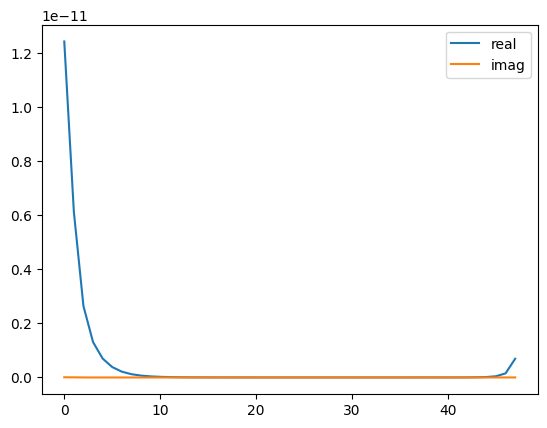

In [80]:
times=np.arange(T)
np.mean(corr_2p.real,axis=0)
np.mean(corr_2p.imag,axis=0)

plt.plot(times,np.mean(corr_2p.real,axis=0),label='real')
plt.plot(times,np.mean(corr_2p.imag,axis=0),label='imag')
plt.legend()

In [81]:
#cast to real
#corr_2p = corr_2p.real
#corr_2p = corr_2p.imag
corr_2p = np.abs(corr_2p)

In [82]:
np.shape(corr_2p)

(212, 48)

In [83]:
def jackknife(in_array: np.ndarray, observable: Callable[[], Any], jack_axis=0, time_axis=-1, binsize=1,first_conf=0,last_conf=nconf) -> list:
    """
    input:
        - array to be jackknifed,
        - axis over which jackknifing (the one with the configurations),
        - function of the observable to be estimated with the jackknife (its input has to have the same shape as in_array)
    output:
        - list with [mean, std] where mean and std are np array with same the same shape as the input one
    """

    #step 1: creation of the jackknife resamples
    jack_resamples = np.asarray( [np.delete(in_array, list(range(iconf,min(iconf+binsize,last_conf))) ,axis=jack_axis) for iconf in range(first_conf,last_conf,binsize)] )
    print("jack resamples")
    print(np.shape(jack_resamples))

    #the number of resamples is len(jack_resmaples[0]) or also
    #nresamp = int((last_conf-first_conf)/binsize)
    nresamp = np.shape(jack_resamples)[0] #the 0th axis now is the resample axis, (and axis has nconf-1 conf in the standard case (binsize=1 ecc.) )

    #step 2; for each resample we compute the obsrvable of interest
    #we use the resampled input array to compute the observable we want, and we have nresamp of them
    obs_resamp = np.asarray( [observable(jack_resamples[i]) for i in range(nresamp) ] )  
    print("obs resamples")
    print(np.shape(obs_resamp))

    #step 3: we compute the observable also on the whole dataset
    obs = observable(in_array)
    print("obs")
    print(np.shape(obs))

    #step4: compute estimate, bias and std according to the jackknife method
    
    #the estimate is the mean of the resamples
    jack_mean = np.mean(obs_resamp,axis=0) #axis 0 is the resamples one
    print("jack mean")
    print(np.shape(jack_mean))

    #the jackknife bias is given by the following formula
    bias = (nresamp-1) * (jack_mean - obs) 
    print("bias")
    print(np.shape(bias))

    #the jack std is given by the following formula
    obs_std = np.sqrt( (nresamp-1)/nresamp * np.sum( (obs_resamp - jack_mean)**2, axis=0 ) ) #the axis is the resamples one
    print("obs std")
    print(np.shape(obs_std))

    #to obtain the final estimate we correct the jack mean by the bias
    obs_mean = jack_mean - bias

    #let's now also obtain the covariance matrix for the time direction
    covmat = np.empty( (np.shape(obs_mean)[time_axis],np.shape(obs_mean)[time_axis]) ) #(np.delete(np.shape(obs_mean),time_axis),) + (np.shape(obs_mean)[time_axis],np.shape(obs_mean)[time_axis],) ) ###ACHTUNG: here valid only for time_axis=-1
    for t1 in range(np.shape(obs_mean)[time_axis]):
        for t2 in range(np.shape(obs_mean)[time_axis]):
            ##########ADJUST DIMENSIONSSS
            covmat[t1,t2] = (nresamp-1)/nresamp * np.sum( (obs_resamp[:,t1] - obs[t1]) * (obs_resamp[:,t2] - obs[t2]),axis=0 )


    #we return mean and std 
    return [obs_mean, obs_std, covmat]

In [84]:
#function to be used with the jackknife to compute the gauge average of the correlators
def gauge_average(in_array: np.ndarray, gauge_axis=0) -> np.ndarray:
    return np.mean(in_array, axis=gauge_axis)

In [85]:
nresamp = nconf
nresamp

212

In [86]:
corr2p_mean, corr2p_std, corr2p_cov = jackknife(corr_2p, gauge_average, jack_axis=0)
np.shape(corr2p_mean)
np.shape(corr2p_std)

jack resamples
(212, 211, 48)
obs resamples
(212, 48)
obs
(48,)
jack mean
(48,)
bias
(48,)
obs std
(48,)


(48,)

(48,)

<ErrorbarContainer object of 3 artists>

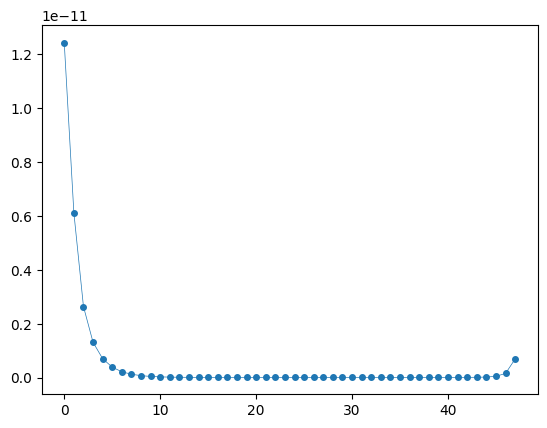

In [87]:
times=np.arange(T)
plt.errorbar(times,corr2p_mean,yerr=corr2p_std, linewidth=0.5,marker='o',markersize=4,elinewidth=1.0)
#plt.yscale('log')

In [88]:
corr2p_std/corr2p_mean
np.mean(np.abs(corr2p_std/corr2p_mean))

array([0.0047893 , 0.0051008 , 0.0050483 , 0.00490141, 0.00555366,
       0.00627663, 0.0071804 , 0.00867937, 0.01108055, 0.01470305,
       0.02018879, 0.02560155, 0.03619028, 0.04732855, 0.0553013 ,
       0.06201486, 0.06351225, 0.06399384, 0.07091864, 0.07611213,
       0.08190346, 0.09518788, 0.08556924, 0.07918494, 0.08360015,
       0.07621892, 0.07084029, 0.07305506, 0.09160968, 0.09811212,
       0.08779062, 0.12112703, 0.10548798, 0.08339313, 0.07489156,
       0.05626594, 0.05978276, 0.06684182, 0.06594051, 0.06937017,
       0.06512825, 0.05028145, 0.051971  , 0.05124296, 0.0330095 ,
       0.01765455, 0.00933781, 0.00632993])

np.float64(0.052200090631876805)

In [89]:
#function to be used with the jackknife to compute the effective mass of the correlators
def eff_mass(corr_array: np.ndarray,gauge_axis=0) -> np.ndarray:
    #the input array is the array with the 2point correlators

    #we first take the gauge average
    corr_gavg = np.mean(corr_array, axis=gauge_axis)

    #then we rearrange the array as to have the time as first axis
    #corr_gavg_t = np.moveaxis(corr_gavg, time_axis, 0)

    #for the effective mass the number of time values is Tm1 = T - 1
    #Tm1 = np.shape(corr_gavg_t)[0]-1
    Tm1 = np.shape(corr_gavg)[0]-1

    #we instantiate the eff mass array with first dimension of size tvalues - 1
    #meff = np.zeros(( (Tm1,) + np.shape(corr_gavg_t)[1:] ))
    #"meff"
    #print(np.shape(meff))

    meff = np.empty((Tm1))

    #we compute the effective mass
    for t in range(Tm1):
        #meff[t] = np.log( corr_gavg_t[t]) - np.log( corr_gavg_t[t+1])#np.log( corr_gavg_t[t]/corr_gavg_t[t+1] )
        #meff[t] = np.log(corr_gavg[t]) - np.log(corr_gavg[t+1])
        meff[t] = np.log( (corr_gavg[t]/corr_gavg[t+1]).real )

    #then we bring the time axis back to its position
    #meff = np.moveaxis(meff, 0, time_axis)

    #we send back the effective mass
    return meff

In [90]:
meff_mean, meff_std, meff_cov = jackknife(corr_2p, eff_mass, jack_axis=0)


jack resamples
(212, 211, 48)
obs resamples
(212, 47)
obs
(47,)
jack mean
(47,)
bias
(47,)
obs std
(47,)


<ErrorbarContainer object of 3 artists>

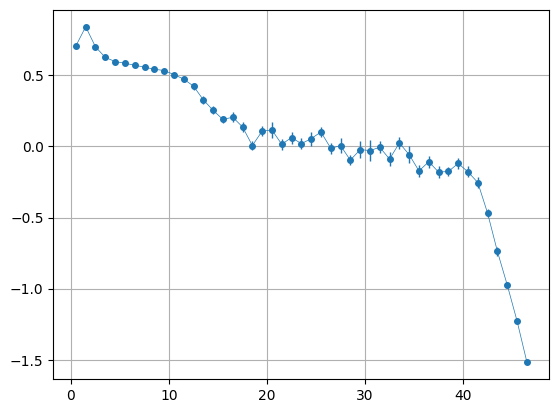

In [91]:
times=np.arange(T)
m_times = times[:-1] +0.5
plt.errorbar(m_times,meff_mean,yerr=meff_std,linewidth=0.5,marker='o',markersize=4,elinewidth=1.0)
plt.grid()

In [92]:
np.shape(corr_2p)

#np.shape( np.rollaxis(corr_2p, -1) )

ok = np.zeros((12,35,77,87))
np.shape(ok)

#np.shape( np.rollaxis( ok , 3) )

ok2 = np.moveaxis( ok , 2, 0)

np.shape( ok2 )

ok3 = np.moveaxis(ok2, 0, 2)

np.shape( ok3 )

(ok3==ok).all()

(212, 48)

(12, 35, 77, 87)

(77, 12, 35, 87)

(12, 35, 77, 87)

np.True_

In [93]:
np.shape(ok)[1:]

ok33 = np.empty(((1,) + (4,67)))

np.shape(ok33)[2]-1

(35, 77, 87)

66

In [94]:
oks = np.ones((10,1,2))
def foo(inarray):
    print(np.shape(inarray))
    return np.zeros(np.shape(inarray))

ttt = np.empty(np.shape(oks))
ttt = np.asarray( [ foo(oks[i]) for i in range(np.shape(oks)[0]) ] )
ttt

(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]])

(212, 48)

<ErrorbarContainer object of 3 artists>

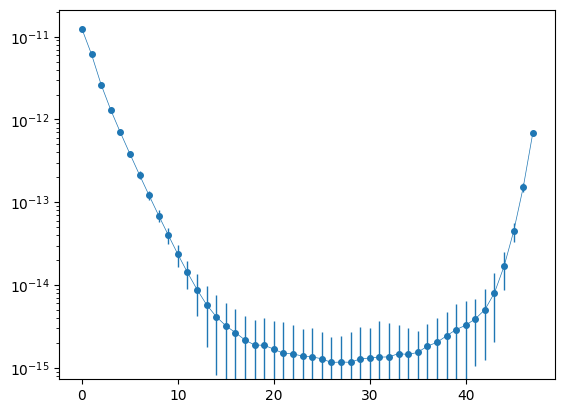

In [95]:
np.shape(corr_2p)

corr_2p_gavg = np.mean(corr_2p,axis=0)
corr_2p_gavg_std = np.std(corr_2p,axis=0)

plt.errorbar(times,corr_2p_gavg,yerr=corr_2p_gavg_std,linewidth=0.5,marker='o',markersize=4,elinewidth=1.0)
plt.yscale('log')
#plt.xlim(0,20)

In [96]:
np.shape(corr_2p_gavg)

(48,)

<ErrorbarContainer object of 3 artists>

(0.0, 48.0)

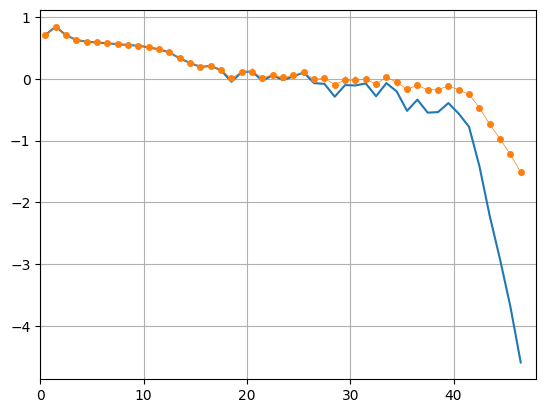

In [97]:
meff = np.empty((T-1))
for t in range(T-1):
    meff[t] = np.log((corr_2p_gavg[t]/corr_2p_gavg[t+1]).real)

    massa = meff[t]
    for it in range(150):
        den = 1 - np.exp( -2*massa * ( T-t  ) )
        num = 1 - np.exp( -2*massa * ( T-t-1) )
        
        new_massa = np.log( (corr_2p_gavg[t]/corr_2p_gavg[t+1]).real * num/den )

        if np.abs(massa-new_massa)/massa < 3e-10:
                massa=new_massa
                #print(f"{it}")
                break
        massa = new_massa
    meff[t] = massa

tcut = 48
tmin = 0

plt.plot(m_times[tmin:tcut],meff[tmin:tcut])
plt.errorbar(m_times[tmin:tcut],meff_mean[tmin:tcut],yerr=meff_std[tmin:tcut],linewidth=0.5,marker='o',markersize=4,elinewidth=1.0)
plt.grid()
plt.xlim(tmin,tcut)

In [98]:
#auxiliary function to compute the chi2 of a fit
def chi2(array,std_array,axis):
    avg = np.mean(array,axis=axis,keepdims=True)
    return np.sum( ((array-avg)/std_array)**2 , axis=axis) / np.shape(array)[axis]

In [99]:
#algo to search for the plateau value
rcut = 10
lcut = 10
chi2_ref = 1.5
for icut in range(1,int(T/2)):

    plateaux_value = np.mean(meff_mean[icut+lcut:-icut-rcut])
    plateaux_std = np.sqrt( np.mean( meff_mean[icut+lcut:-icut-rcut]**2 ) )

    if chi2(meff_mean[icut+lcut:-icut-rcut],meff_std[icut+lcut:-icut-rcut],axis=0) < chi2_ref:
        chosen_cut = icut
        chosen_cut
        break

9

<ErrorbarContainer object of 3 artists>

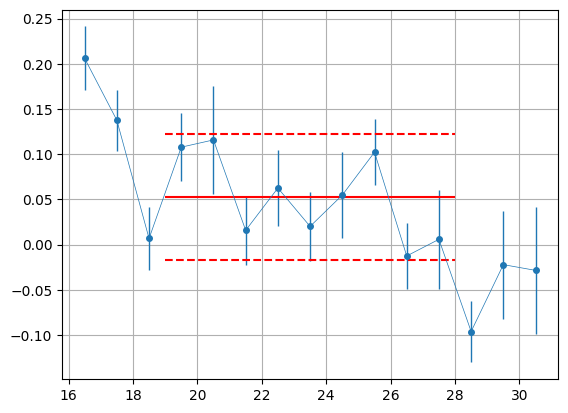

In [100]:
zoom = 3
plt.errorbar(m_times[chosen_cut+lcut -zoom:-chosen_cut-rcut + zoom],meff_mean[chosen_cut+lcut -zoom:-chosen_cut-rcut + zoom],yerr=meff_std[chosen_cut+lcut -zoom:-chosen_cut-rcut + zoom],linewidth=0.5,marker='o',markersize=4,elinewidth=1.0)
plt.hlines(plateaux_value,chosen_cut+lcut, T -1 -chosen_cut-rcut,color='red')
plt.hlines(plateaux_value+plateaux_std,chosen_cut+lcut, T -1 -chosen_cut-rcut,color='red',linestyles='dashed')
plt.hlines(plateaux_value-plateaux_std,chosen_cut+lcut, T -1 -chosen_cut-rcut,color='red',linestyles='dashed')
plt.grid()

In [101]:
#auxiliary function to compute chi2 of a fit taking into account the covariant matrix
def reduced_cov_chi2(array,cov_array,axis):
    cov_inv = np.linalg.inv(cov_array)
    avg = np.mean(array,axis=axis,keepdims=True)
    deltas = array-avg

    plateau_T = np.shape(array)[axis]

    #return np.dot( deltas, np.dot(cov_inv, deltas))

    return np.einsum( 'j,j->' , deltas, np.einsum('jk,k->j',cov_inv,deltas) ) / plateau_T #achtung: indices are not related to general case

In [102]:
#algo to search for the plateau value
rcut = 10
lcut = 10
chi2_ref = 1.0 * 2
for icut in range(1,int(T/2)):

    plateaux_value = np.mean(meff_mean[icut+lcut:-icut-rcut])
    plateaux_std = np.sqrt( np.mean( meff_mean[icut+lcut:-icut-rcut]**2 ) )

    if reduced_cov_chi2(meff_mean[icut+lcut:-icut-rcut],meff_cov[icut+lcut:-icut-rcut,icut+lcut:-icut-rcut],axis=0) < chi2_ref:
        chosen_cut = icut
        chosen_cut
        break

9

<ErrorbarContainer object of 3 artists>

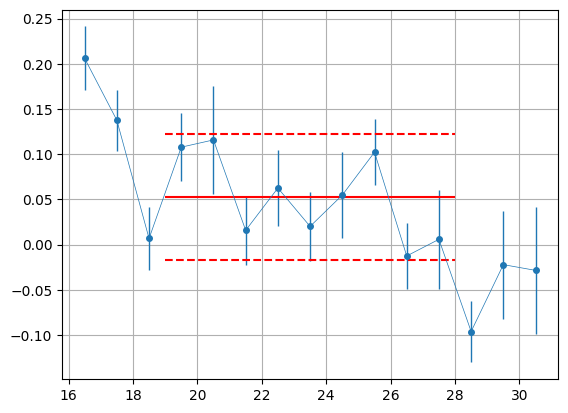

In [103]:
zoom = 3
plt.errorbar(m_times[chosen_cut+lcut -zoom:-chosen_cut-rcut + zoom],meff_mean[chosen_cut+lcut -zoom:-chosen_cut-rcut + zoom],yerr=meff_std[chosen_cut+lcut -zoom:-chosen_cut-rcut + zoom],linewidth=0.5,marker='o',markersize=4,elinewidth=1.0)
plt.hlines(plateaux_value,chosen_cut+lcut, T -1 -chosen_cut-rcut,color='red')
plt.hlines(plateaux_value+plateaux_std,chosen_cut+lcut, T -1 -chosen_cut-rcut,color='red',linestyles='dashed')
plt.hlines(plateaux_value-plateaux_std,chosen_cut+lcut, T -1 -chosen_cut-rcut,color='red',linestyles='dashed')
plt.grid()

# Operator related Stuff

In [110]:
dstructure_list

['g0',
 'g1',
 'g10',
 'g11',
 'g12',
 'g13',
 'g14',
 'g15',
 'g2',
 'g3',
 'g4',
 'g5',
 'g6',
 'g7',
 'g8',
 'g9']

In [ ]:
#!!!!!!!!!! check the correctness of this mapping TO DO

#mapping between the pair (dirac structure, index) and the actual gamma matrix to be used
dirac_dict = {('V',0):'g0', #identity matrix
              ('V',1):'g1', ('V',2):'g2', ('V',3):'g3',  ('V',4):'g4', #gamma1, ..., gamma4
              ('A',0):'g5', #gamma5
              ('A',1):'g6', ('A',2):'g7', ('A',3):'g8',  ('A',4):'g9', #gamma1gamma5, ..., gamma4gamma5
              ('T',12):'g10', ('T',13):'g11', ('T',14):'g12', ('T',23):'g13', ('T',24):'g14', ('T',34):'g15'} #gamma1gamma2, ..., gamma3gamma4

In [ ]:

#function used to read the 3point correalators
def corr3p_reading(basefolder:str, sep_T:int, dirac: str, op_list: list,
                   tag = 'bb', smear = None, m = None, hadron = 'proton_3',
                   momentum = None, qcontent = None, ins_mom = None) -> np.ndarray:
    """
    Input:
        - basefolder: path to the folder containing the data
        - sep_T: separation in time between source and insertion in the 3 point correlator
        - dirac: 'V', 'A', or 'T', that is the dirac structure of the 3 point correlator
        - op_list: list with as many element as operators, each element being the instruction on how to construct a given operator
        - None parameters will fall to default values
    TO DO : FIX INPUT CHECK !!!
    """


    #First we look into the given folder to see how many configurations we have

    #Path file to the data folder
    p = Path(basefolder).glob('**/*')
    files = [x for x in p if x.is_file()]

    #number of data files (i.e. the number of gauge configurations, and for each the 3point correlator is computed)
    nconf = len(files)


    #We take the number of operators from the length of the op_list

    #number of operators
    nops = len(op_list)


    #We can now instantiate the np where we will store the 3 point correlators

    #array for the 3p corr, with shape (nconf, nops, sep_T+1)
    corr_3p = np.empty((nconf, nops, sep_T+1),dtype=complex)


    #We now cycle throguh the files in the given folder and read the correlators, taking the appropiate combinations corresponding to the given operators

    #we cycle through the files in the folder
    for i,file in enumerate(files):


        #we open the h5 file corresponding too the i-th configuration
        with h5.File(basefolder+file.name, 'r') as h5f:


            #We construct the keys according to the input parameters, then read the correlator accordingly

            #id of the given configuration
            cfgid = list(h5f.keys())[0] # = 'cfg090211_044614' (or smth like that) (this is a list with only one element, the id of the configuration)

            #tag of the correlator we want to read (by default is 'bb')
            if tag not in list(h5f[cfgid]): #the list is ['bb','bb_d2_dpx2','bb_d2_dpy2','bb_d2_dpz2','bb_d_dpx','bb_d_dpy',....] (or smth like that)
                return "Error: tag not valid"
            
            #smearing of the correlator
            if None == smear:
                smear = list(h5f[cfgid][tag])[0] # the list ['GN3x60-GN3x60'] (or smth like that), and we choose to have both source and sink smeared
            elif smear not in list(h5f[cfgid][tag]): 
                return "Error: smear not valid"
            
            #mass of the quark
            if None == m:
                m = list(h5f[cfgid][tag][smear])[0]
            elif m not in list(h5f[cfgid][tag][smear]):
                return "Error: mass not valid"

        
            #hadron we are interested in (by default is 'proton_3')
            if hadron not in list(h5f[cfgid][tag][smear][m]):
                return "Error: hadron not valid"
            

            #quark content of the hadron
            if None == qcontent:
                qcontent = list(h5f[cfgid][tag][smear][m][hadron])[0]  #this list should be ['D', 'U'], and we are choosing D
            elif qcontent not in list(h5f[cfgid][tag][smear][m][hadron]):
                return "Error: qcontent not valid"

        
            #momentum of the correlator
            if None == momentum:
                momentum = 'PX0_PY0_PZ0_T' + str(sep_T) #because the mom list is smt like ['PX-2_PY0_PZ0_T8', 'PX0_PY0_PZ0_T8'] and we look at the 0 momentum case
            elif momentum not in list(h5f[cfgid][tag][smear][m][hadron][qcontent]):
                return "Error: momentum not valid"

        
            #To understand which displacement and dirac structure to read we look at the instruction into the op list

            #loop over the op list
            for iop,op_instr in enumerate(op_list):

                #the first element of the instruction is the gamma matrix in the dirac structure
                gamma_index = op_instr[0]

                #to obtain the complete dirac structure we also look in which case we are (V,A,T), and we construct the dirac structure accordingly using a dict with the right mapping
                dstruct = dirac_dict[(dirac,gamma_index)]

                #before reading the displacement we instatiate the readed correlator to 0
                tmp_corr = complex(0,0)


                #to read the right displacement we look from the second element of the instruction on

                #from the second element on the instruction list contains pairs with the displacement and the numerical coefficient in front of it
                for coeff,displ in enumerate(op_instr[1:]):
                    
                    #last thing before the correlator reading: we set the insertion momentum to its default value
                    if None == ins_mom:
                        ins_mom = list(h5f[cfgid][tag][smear][mass][hadron][qcontent][momentum][displ][dstruct])[0] #this should be 'qx0_qy0_qz0'
                    elif ins_mom not in list(h5f[cfgid][tag][smear][mass][hadron][qcontent][momentum][displ][dstruct]):
                        return "Error: ins_mom not valid"
                
                    #we now update the tmp correlator reading a piece of it according to the operator instruction
                    tmp_corr += coeff * h5f[cfgid][tag][smear][mass][hadron][qcontent][momentum][displ][dstruct][ins_mom]

                #we then store the tmp_corr into the right place in the corr_3p array
                corr_3p[i,iop] = tmp_corr



    #once we read everything we return the array with the 3 point correlators
    return corr_3p


In [124]:
#op_instr should be a list with:
#    - first element = an index (0 for indentity, 1 for gamma1 ecc.)
#    - every other element should be a tuple with (coeff,displ), where coeff is a float and displ the str corresponding to the displacement in the h5 file

In [ ]:
def indices_to_instruction(dirac:str, index_list:list) -> list:
    """
    Input:
        - dirac: 'V', 'A', or 'T', that is the dirac structure of the operator
        - index_list: list with the indices for the given operator
    Output:
        - list with the instruction list to be used in the corr3p_reading function
    """

    #we instatiate the instruction list
    instr = []


    #then we start to fill the list

    #the first element of list should be the index(indices) related to the gamma matrices

    #for V and A that is only one index, for T it is the first two
    if dirac in ['V','A']:
        instr.append( int(index_list[0]) )
        start_index = 1 #the element we start to read from after the first instruction
    elif dirac == 'T':
        instr.append( int(str(index_list[0])+str(index_list[1])) )
        start_index = 2 #the element we start to read from after the first instruction


    #then to every other index besides the first we associate a particular combinations of displacements

    #the dict expliciting the axes names is
    axes_dict = {1:'x',2:'y',3:'z',4:'t'}

    #the number of covariant derivatives is the number of indices -1 for V and A, and -2 for T
    nder = len(index_list) - start_index

    #to every index there is associated a forward minus backward covariant derivate, to which we associate the following combinations of displacements
    if nder==1:
        instr.append( (2.0,'l1_'+axes_dict[index_list[start_index]].upper() ) )
        instr.append( (-2.0,'l1_'+axes_dict[index_list[start_index]].lower() ) )
    elif nder==2:
        pass #TO DO !!!
    else:
        print("Error: nder>2 can't be implemented")
        return None

    
    



3

5

In [72]:
class bulding_block:
    """
    Create one instance of the class to read the building blocks from the given folders
    """

    ## Global variable shared by all class instances

    #initialization function

    """
    IDEA: have the function read all the BBs in the path, and store them in a dict, then have as parameters the defualt keys to be used to access the dictionary, then have a function construucting
    from the dict a np array, looking only at the keys specified in the class instance (this can be changed but have a default value)"""

    def __init__(self, bb_folder,
                 tag='bb',hadron='proton_3',
                 maxConf=None, verbose=False):
        
        """
        Input description:...
        """


        #Info Print
        if verbose:
            print("\nInitializing the building block class instance...\n")
        
        
        #First we look into the given folder to see how many configurations we have

        #we store the folder for later use
        self.bb_folder = bb_folder

        #Path file to the data folder
        p = Path(bb_folder).glob('**/*')
        files = [x for x in p if x.is_file()]

        #we store the number of configurations into a class variable (nconf is given by the number of data files in the given folder)
        #if maxConf is not specified we take all the configurations, otherwise we read a smaller amount
        if maxConf is None or maxConf > len(files):
            self.nconf = len(files)
        else:
            self.nconf = maxConf

        #we store the list with all the configuration names
        self.conflist = [file.name for file in files]


        #Now looking only at the first configuration we read the keys of the h5 file structure

        #first conf is
        firstconf = self.conflist[0]

        #we open the h5 file corresponding too the first configuration
        with h5.File(bb_folder+firstconf, 'r') as h5f:

            #we read all the available keys and store them in lists

            #id of the given configuration (this is equal to firstconf)
            cfgid = list(h5f.keys())[0]

            #we store all the keys of the nested dictionaries structure of the h5 file
            self.tag_list = list(h5f[cfgid])
            self.smearing_list = list(h5f[cfgid][self.tag_list[0]])
            self.mass_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]])
            self.hadron_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]])
            self.qcontent_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]][self.hadron_list[0]])
            self.momentum_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]][self.hadron_list[0]][self.qcontent_list[0]])
            self.displacement_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]][self.hadron_list[0]][self.qcontent_list[0]][self.momentum_list[0]])
            self.dstructure_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]][self.hadron_list[0]][self.qcontent_list[0]][self.momentum_list[0]][self.displacement_list[0]])
            self.insmomementum_list = list(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]][self.hadron_list[0]][self.qcontent_list[0]][self.momentum_list[0]][self.displacement_list[0]][self.dstructure_list[0]])

            #we store the time extent of the correlator we have
            self.T = len(h5f[cfgid][self.tag_list[0]][self.smearing_list[0]][self.mass_list[0]][self.hadron_list[0]][self.qcontent_list[0]][self.momentum_list[0]][self.displacement_list[0]][self.dstructure_list[0]][self.insmomementum_list[0]])


        #we choose a default values for the different keys we want to be specified at reading time (for the other keys instead we loop over and read them)
        self.tag = tag
        self.smearing = self.smearing_list[0]
        self.mass = self.mass_list[0]
        self.hadron = hadron
        self.momentum = [mom for mom in self.momentum_list if mom.startswith('PX0_PY0_PZ0')][0] #we take the 0 forward momentum as default
        self.insmomentum = 'qx0_qy0_qz0' #same for the insertion momentum (this is the only choice available for every other key choice)

        #we store the dimensionality of the dimension we have not fixed and that we want to read
        self.nquarks = len(self.qcontent_list)
        self.ndisplacements = len(self.displacement_list)
        self.ndstructures = len(self.dstructure_list)


        #Now we loop over the configurations and we convert the nconf h5 files into a single dictionary

        #info print
        if verbose:
            print("\nLooping over the configurations to read the building blocks from the h5 files...\n")

        #we initialize the np array with the building blocks
        self.bb_array = np.zeros(shape=(self.nconf, self.nquarks, self.ndisplacements, self.ndstructures, self.T),dtype=complex)

        #we loop over the configurations
        for iconf, file in enumerate(tqdm(files[:self.nconf])):

            #we open the h5 file corresponding too the current configuration
            with h5.File(bb_folder+file.name, 'r') as h5f:

                #id of the given configuration (this is equal to firstconf)
                cfgid = list(h5f.keys())[0]

                #we loop over the keys that have not been set:
                for iq, qcontent in enumerate(self.qcontent_list):
                    for idisp, displacement in enumerate(self.displacement_list):
                        for idstruct, dstructure in enumerate(self.dstructure_list):

                            #we read the building block and store it in the np array
                            self.bb_array[iconf, iq, idisp, idstruct] = h5f[cfgid][self.tag][self.smearing][self.mass][self.hadron][qcontent][self.momentum][displacement][dstructure][self.insmomentum]




    #function used to print the information regarding the keys in the dictionary
    def print_keys(self):


        #First we print the currently chosen values for the keys
        print("\nSelected Keys:\n")
        print(f"    -tag: {self.tag}")
        print(f"    -smearing: {self.smearing}")
        print(f"    -mass: {self.mass}")
        print(f"    -hadron: {self.hadron}")
        #print(f"    -qcontent: {self.qcontent}")
        print(f"    -momentum: {self.momentum}")
        #print(f"    -displacement: {self.displacement}")
        #print(f"    -dstructure: {self.dstructure}")
        print(f"    -insmomentum: {self.insmomentum}")


        #Then we print the lists with all the available keys
        print("\nAvailable Keys:\n")
        print(f"tag_list: {self.tag_list}")
        print(f"smearing_list: {self.smearing_list}")
        print(f"mass_list: {self.mass_list}")
        print(f"hadron_list: {self.hadron_list}")
        print(f"qcontent_list: {self.qcontent_list}")
        print(f"momentum_list: {self.momentum_list}")
        print(f"displacement_list: {self.displacement_list}")
        print(f"dstructure_list: {self.dstructure_list}")
        print(f"insmomementum_list: {self.insmomementum_list}")

        print("\nACHTUNG: not every combination of the above keys may be available\n")

    
    #function used to change the keys and reread the h5 files accordingly
    def update_keys(self, tag=None, smearing=None, mass=None, hadron=None, momentum=None, insmomentum=None, verbose=False):

        #we update the keys the user wants to change

        #auxiliary lists
        keys = [tag,smearing,mass,hadron,momentum,insmomentum]
        keys_list = [self.tag_list, self.smearing_list, self.mass_list, self.hadron_list, self.momentum_list, self.insmomementum_list]
        keys_name = ['tag','smearing','mass','hadron','momentum','insertion momementum']

        #flag used to signal an update in the keys
        update=False

        #we loop over the keys and update them if the user has specified a new value
        for i,k in enumerate(keys):
            if k in keys_list[i]:
                match i:
                    case 0:
                        self.tag = k
                    case 1:
                        self.smearing = k
                    case 2:
                        self.mass = k
                    case 3:
                        self.hadron = k
                    case 4:
                        self.momentum = k
                    case 5:
                        self.insmomentum = k
                update=True
            elif k is not None:
                print(f"Error: {keys_name[i]} not valid (look at the available keys with the print_keys method)")
        
        
        #if one of the keys has been updated we reread the h5 files
        if update is True:

            #info print
            if verbose:
                print("\nReading the building blocks from the h5 files according to the new keys...\n")


            #this is a copy of the reading procedure from the __init__ function

            #Path file to the data folder
            p = Path(self.bb_folder).glob('**/*')
            files = [x for x in p if x.is_file()]
            
            self.bb_array = np.zeros(shape=(self.nconf, self.nquarks, self.ndisplacements, self.ndstructures, self.T),dtype=complex)

            #we loop over the configurations
            for iconf, file in enumerate(tqdm(files[:self.nconf])):

                #we open the h5 file corresponding too the current configuration
                with h5.File(self.bb_folder+file.name, 'r') as h5f:

                    #id of the given configuration (this is equal to firstconf)
                    cfgid = list(h5f.keys())[0]

                    #we loop over the keys that have not been set:
                    for iq, qcontent in enumerate(self.qcontent_list):
                        for idisp, displacement in enumerate(self.displacement_list):
                            for idstruct, dstructure in enumerate(self.dstructure_list):

                                #we read the building block and store it in the np array
                                self.bb_array[iconf, iq, idisp, idstruct] = h5f[cfgid][self.tag][self.smearing][self.mass][self.hadron][qcontent][self.momentum][displacement][dstructure][self.insmomentum]



    #function used to construct the right covariant derivative of the building blocks (with the chosen keys)
    def covD_r1(self) -> np.ndarray:

        """
        The function takes no argument since the keys are all specified and the combination of displacements to be used is fixed

        The output is an object with shape (nconf, nquarks, ndstructures, T, 4), 4 being the dimensionality of the index mu of the covariant derivative
        
        (the code assumes the momentum to be 0)
        """

        #list with the mu indices
        mu_list = ['x','y','z','t']

        #we instatiate the np array where we will store the covariant derivative of the building blocks
        covD_r1_array = np.zeros(shape=(self.nconf, self.nquarks, self.ndstructures, self.T,4),dtype=complex) #the last dimension is the mu index of the covariant derivative

        #for each mu we compute the right derivative of the building block
        for i, mu in enumerate(mu_list):

            #the displacements we have to use are the following
            disp1 = 'l1_'+mu.upper()
            disp2 = 'l1_'+mu.lower()
            #with indices given by
            idisp1 = self.displacement_list.index(disp1)
            idisp2 = self.displacement_list.index(disp2)

            #knowing which displacements to use we can now compute the right covariant derivative as follows

            #       conf,quarks,dstruct,T,mu            conf,quarks,displacements,dstruct,T
            covD_r1_array[:, :, :, :, i] = self.bb_array[:, :, idisp1, :, :] - self.bb_array[:, :, idisp2, :, :]

        #we return the right covariant derivative
        return covD_r1_array
    


    #function used to construct the left covariant derivative of the building blocks (with the chosen keys)
    def covD_l1(self) -> np.ndarray:

        """
        The function takes no argument since the keys are all specified and the combination of displacements to be used is fixed

        The output is an object with shape (nconf, nquarks, ndstructures, T, 4), 4 being the dimensionality of the index mu of the covariant derivative
        
        (the code assumes the momentum to be 0)
        """

        #list with the mu indices
        mu_list = ['x','y','z','t']

        #we instatiate the np array where we will store the covariant derivative of the building blocks
        covD_l1_array = np.zeros(shape=(self.nconf, self.nquarks, self.ndstructures, self.T,4),dtype=complex) #the last dimension is the mu index of the covariant derivative

        #for each mu we compute the right derivative of the building block
        for i, mu in enumerate(mu_list):

            #the displacements we have to use are the following (reversed wrt the r1 case)
            disp1 = 'l1_'+mu.lower()
            disp2 = 'l1_'+mu.upper()
            #with indices given by
            idisp1 = self.displacement_list.index(disp1)
            idisp2 = self.displacement_list.index(disp2)

            #knowing which displacements to use we can now compute the right covariant derivative as follows

            #the procedure is different for spatial and temporal components:
            #(in particular for the temporal component the temporal axis has to be shifted by -1 for backward displacement and by +1 for forward displacement)

            #for the spatial components we have
            if i<3:
                #       conf,quarks,dstruct,T,mu            conf,quarks,displacements,dstruct,T
                covD_l1_array[:, :, :, :, i] = self.bb_array[:, :, idisp1, :, :] - self.bb_array[:, :, idisp2, :, :]
            #for the temporal component we have
            elif i==3:
                #       conf,quarks,dstruct,T,mu            conf,quarks,displacements,dstruct,T
                covD_l1_array[:, :, :, :, i] = np.roll(self.bb_array[:, :, idisp1, :, :], shift=-1, axis=-1) - np.roll(self.bb_array[:, :, idisp2, :, :], shift=1, axis=-1) #axis=-1 is the time axis
            

        #we return the right covariant derivative
        return covD_l1_array





# Tests of class from other file

In [7]:
(10,20,) + (4,)*3

(10, 20, 4, 4, 4)

In [3]:
import sys

sys.path.insert(1, '../')

from building_blocks_reader import bulding_block

In [4]:
ok = bulding_block("/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/" + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/T6/", maxConf=2, verbose=True)


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:04<00:00,  2.24s/it]


In [5]:
ok.print_keys()
np.shape(ok.bb_array)

ok.update_keys(hadron='proton_negpar_3', verbose=True)
ok.print_keys()


Selected Keys AAAAAAAAAAAAAAAAAAAA:

    -tag: bb
    -smearing: GN3x60-GN3x60
    -mass: mq-0.09933
    -hadron: proton_3
    -momentum: PX0_PY0_PZ0_T6
    -insmomentum: qx0_qy0_qz0

Available Keys:

tag_list: ['bb', 'bb_d2_dpx2', 'bb_d2_dpy2', 'bb_d2_dpz2', 'bb_d_dpx', 'bb_d_dpy', 'bb_d_dpz', 'bb_dfrw_dpx_dseq_dpx', 'bb_dfrw_dpx_dseq_dpy', 'bb_dfrw_dpx_dseq_dpz', 'bb_dfrw_dpy_dseq_dpx', 'bb_dfrw_dpy_dseq_dpy', 'bb_dfrw_dpy_dseq_dpz', 'bb_dfrw_dpz_dseq_dpx', 'bb_dfrw_dpz_dseq_dpy', 'bb_dfrw_dpz_dseq_dpz', 'bb_dseq_dpx', 'bb_dseq_dpy', 'bb_dseq_dpz']
smearing_list: ['GN3x60-GN3x60']
mass_list: ['mq-0.09933']
hadron_list: ['proton_3', 'proton_negpar_3']
qcontent_list: ['D', 'U']
momentum_list: ['PX-2_PY0_PZ0_T6', 'PX0_PY0_PZ0_T6']
displacement_list: ['l0_', 'l1_T', 'l1_X', 'l1_Y', 'l1_Z', 'l1_t', 'l1_x', 'l1_y', 'l1_z', 'l2_TT', 'l2_TX', 'l2_TY', 'l2_TZ', 'l2_Tx', 'l2_Ty', 'l2_Tz', 'l2_XT', 'l2_XX', 'l2_XY', 'l2_XZ', 'l2_Xt', 'l2_Xy', 'l2_Xz', 'l2_YT', 'l2_YX', 'l2_YY', 'l2_YZ', 'l2_Yt

100%|██████████| 2/2 [00:05<00:00,  2.70s/it]


Selected Keys AAAAAAAAAAAAAAAAAAAA:

    -tag: bb
    -smearing: GN3x60-GN3x60
    -mass: mq-0.09933
    -hadron: proton_negpar_3
    -momentum: PX0_PY0_PZ0_T6
    -insmomentum: qx0_qy0_qz0

Available Keys:

tag_list: ['bb', 'bb_d2_dpx2', 'bb_d2_dpy2', 'bb_d2_dpz2', 'bb_d_dpx', 'bb_d_dpy', 'bb_d_dpz', 'bb_dfrw_dpx_dseq_dpx', 'bb_dfrw_dpx_dseq_dpy', 'bb_dfrw_dpx_dseq_dpz', 'bb_dfrw_dpy_dseq_dpx', 'bb_dfrw_dpy_dseq_dpy', 'bb_dfrw_dpy_dseq_dpz', 'bb_dfrw_dpz_dseq_dpx', 'bb_dfrw_dpz_dseq_dpy', 'bb_dfrw_dpz_dseq_dpz', 'bb_dseq_dpx', 'bb_dseq_dpy', 'bb_dseq_dpz']
smearing_list: ['GN3x60-GN3x60']
mass_list: ['mq-0.09933']
hadron_list: ['proton_3', 'proton_negpar_3']
qcontent_list: ['D', 'U']
momentum_list: ['PX-2_PY0_PZ0_T6', 'PX0_PY0_PZ0_T6']
displacement_list: ['l0_', 'l1_T', 'l1_X', 'l1_Y', 'l1_Z', 'l1_t', 'l1_x', 'l1_y', 'l1_z', 'l2_TT', 'l2_TX', 'l2_TY', 'l2_TZ', 'l2_Tx', 'l2_Ty', 'l2_Tz', 'l2_XT', 'l2_XX', 'l2_XY', 'l2_XZ', 'l2_Xt', 'l2_Xy', 'l2_Xz', 'l2_YT', 'l2_YX', 'l2_YY', 'l2_YZ',

In [6]:
der = ok.covD_r1()
np.shape(der)
der[:,:,:,:,3]

der2 = ok.covD_l1()
np.shape(der2)
der2[:,:,:,:,3]

(2, 2, 16, 7, 4)

array([[[[ 3.40765313e-13-8.91637806e-14j,
           1.56641806e-13-5.92778621e-14j,
           7.77011314e-14+2.59465975e-16j,
           1.97715599e-15+4.68492172e-14j,
          -1.74156176e-14+3.67687044e-14j,
          -3.73620314e-14+6.48088463e-15j,
          -1.12696632e-13+5.20253516e-15j],
         [ 4.27816091e-15-7.27591711e-15j,
           1.13791802e-14-6.22954349e-15j,
           7.40461911e-15-3.94295137e-15j,
           3.15287546e-15+3.68355923e-15j,
          -2.65670395e-15+6.95846949e-15j,
          -5.57880307e-15+7.43651698e-15j,
          -7.01467068e-15+2.63954362e-15j],
         [ 1.02245566e-14-7.26219554e-15j,
          -8.05248958e-15-2.42656576e-16j,
          -7.02018114e-15-1.57039510e-15j,
           1.90161211e-15-3.49390139e-15j,
           1.00063222e-14+2.75425555e-15j,
          -2.51156067e-15+8.89282991e-15j,
          -1.05926384e-14+9.24219345e-15j],
         [-4.26080172e-15-5.45355954e-14j,
           1.18776256e-14-9.16559654e-15j,
        

(2, 2, 16, 7, 4)

array([[[[ 5.39995175e-14-5.65991831e-14j,
           1.07626900e-13-5.22202079e-14j,
           2.69364031e-14+9.52914279e-15j,
          -4.78547123e-14+5.48915780e-14j,
          -6.60759517e-14+4.35987625e-14j,
          -8.48503450e-14+1.46464236e-14j,
          -3.99392937e-13+3.90343195e-14j],
         [-1.07312936e-14-9.08043301e-15j,
           2.14320210e-15-5.38990310e-15j,
           4.06746851e-15-6.67272222e-16j,
           7.64528481e-15+5.95331776e-15j,
           4.40691957e-15+5.22618576e-15j,
          -2.78971457e-15+3.11348571e-15j,
          -1.57065248e-14-2.42505828e-15j],
         [ 1.58182352e-14+5.65103629e-15j,
           1.72899221e-14-1.62538424e-14j,
           4.08190158e-15-1.89464029e-14j,
          -1.39515616e-14-1.25895883e-14j,
          -1.07040038e-14+6.48357215e-16j,
           1.63441754e-15+6.27553045e-15j,
          -8.12453224e-15+2.68947793e-14j],
         [-3.77962853e-14-3.14045991e-14j,
           1.93393456e-14-7.85504209e-15j,
        

In [66]:
'''
def get_ds_dictionaries(name, node):
  
    fullname = node.name
    if isinstance(node, h5.Dataset):
    # node is a dataset
        print(f'Dataset: {fullname}; adding to dictionary')
        ds_dict[fullname] = node
        print('ds_dict size', len(ds_dict)) 
    else:
     # node is a group
        print(f'Group: {fullname}; skipping')  
    


basefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/" + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/T8/"

#Path file to the data folder
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]


with h5.File(basefolder+files[0].name,'r') as h5f:
        
    ds_dict = {}  
    print ('**Walking Datasets to get dictionaries**\n')
    h5f.visititems(get_ds_dictionaries)
    print('\nDONE')
    print('ds_dict size', len(ds_dict))
'''

'\ndef get_ds_dictionaries(name, node):\n  \n    fullname = node.name\n    if isinstance(node, h5.Dataset):\n    # node is a dataset\n        print(f\'Dataset: {fullname}; adding to dictionary\')\n        ds_dict[fullname] = node\n        print(\'ds_dict size\', len(ds_dict)) \n    else:\n     # node is a group\n        print(f\'Group: {fullname}; skipping\')  \n    \n\n\nbasefolder = "/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/" + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/T8/"\n\n#Path file to the data folder\np = Path(basefolder).glob(\'**/*\')\nfiles = [x for x in p if x.is_file()]\n\n\nwith h5.File(basefolder+files[0].name,\'r\') as h5f:\n        \n    ds_dict = {}  \n    print (\'**Walking Datasets to get dictionaries**\n\')\n    h5f.visititems(get_ds_dictionaries)\n    print(\'\nDONE\')\n    print(\'ds_dict size\', len(ds_dict))\n'

In [67]:
#list(ds_dict.keys())[1]